#Algorithmes de Machine Learning


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

- Liaison flask/siteweb/sql
- prediction :  (svc, svm, , arbre,randomforest, knn..)
 - Greadsearch,crossval,test/train
 - Analyse de sentiments


- Extraction de données sur siteweb

- ACP, ACM

- Courbe Roc | Dendogramme (et autres outil d'affichage)

- Extraction Vidéo|Audio|Texte ?

- Nettoyage des données



#REGRESSION LINEAIRE SIMPLE/MULTIPLE

L ordonnées à l'origine vaut :  3.9348842378093756
La matrice des coeff tetas est :  [[3.00706991]]


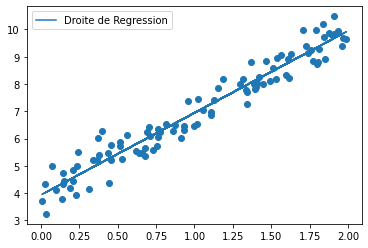

In [ ]:
from sklearn.linear_model import LinearRegression

#Génération des données aléatoires
X = 2*np.random.rand(100,1) 
Y = 4+3*X + np.random.randn(100,1)/2


#Création du modèle et apprentissage
lin_reg = LinearRegression()
lin_reg.fit(X,Y)


print("L ordonnées à l'origine vaut : " , lin_reg.intercept_[0]) #Ordonné à l'arigine
print("La matrice des coeff tetas est : ", lin_reg.coef_) #Valeurs des coefficients tetas 

#Prediction des nouvelles données 
NewX = [[1],[0.5],[1.2]]
prediction = lin_reg.predict(NewX)


#Droite de Regression linéaire 
plt.scatter(X,Y)
plt.plot(X,lin_reg.intercept_ + lin_reg.coef_*X,label="Droite de Regression" )
plt.legend()


#REGRESSION LOGISTIQUE
A rajouter :
- Test avec cross validation 
- Modification du seuil 
- Utilisation de courbe ROC et critère AIC

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split ,cross_val_score ,ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#Exemple sur les données Iris
iris = datasets.load_iris() #Importation des données
X = iris.data
Y = [int(value==0) for value in iris.target] #On predit si un élément a la classe 0 ou non
X_train, X_test, y_train, y_test = train_test_split(X, Y) #Découpage en données train et test

#Création du modèle puis apprentissage sur le train
modeleRegressionLogistique  = LogisticRegression(solver='liblinear') 
model = modeleRegressionLogistique.fit(X_train, y_train)

#Score des prédictions sur les données tests
prediction = model.predict(X_test)
Score = model.score(X_test, y_test)
print('Notre modèle a une accuracy de :',Score)
print("La matrice de confusion associé est : \n" , confusion_matrix(y_test, model.predict(X_test)).T)


Notre modèle a une accuracy de : 1.0
La matrice de confusion associé est : 
 [[27  0]
 [ 0 11]]


#DESCENTE DE GRANDIENT SIMPLE

In [ ]:
from sklearn.preprocessing import StandardScaler
X = 2*np.random.rand(100,1) 
Y = 4+3*X + np.random.randn(100,1)/2
X_new  = np.c_[np.ones((100,1)),X] #Ajout d'une colonne de 1 
#Il faut centrer réduire nos données

scaler = StandardScaler()
#X_new = scaler.fit_transform(X_new)

#Paramètres à optimiser en fonction de nos données
tauxAprentissage = 0.1
nombreIterations = 1000
m = 100



theta = np.random.randn(2,1) #Initialisation aléatoire des thétas
for iteration in range(nombreIterations) :
  gradients = (2/m) * X_new.T.dot(X_new.dot(theta) - Y)
  theta = theta - tauxAprentissage * gradients

In [ ]:
theta

array([[4.12046369],
       [2.91838523]])

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import time
import nltk
!pip install unidecode
import unidecode
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
tokenizer = nltk.RegexpTokenizer(r'\w+')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

stemmer = SnowballStemmer(language='english')
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")

stopWords = set(stopwords.words('english'))

In [ ]:

def lemmatize(listeSentences) :
  listePhrases = []
  for sentence in listeSentences :
    phrase = []
    doc = nlp(sentence)
    for token in doc:
        phrase.append(token.lemma_)
    listePhrases.append(' '.join(phrase))
  return listePhrases


def nettoyage(listeSentences) :
  return [' '.join([w for w in  tokenizer.tokenize(unidecode.unidecode(phrase)) if w not in stopWords ]).lower() for phrase in listeSentences]
  






lemmatization

In [ ]:
# install spacy-lefff library for dataframe limmatization.
!pip install spacy-lefff
!python -m spacy download fr_core_news_sm
!python -m spacy download fr

In [ ]:
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger

# spacy limmatization 
nlp = spacy.load('fr')
french_lemmatizer = LefffLemmatizer()
nlp.add_pipe(french_lemmatizer, name='lefff')

def lemmatize_spacy(text) : 
  text = nlp(text)
  new_text = ""
  for word in text : 
    new_word = word._.lefff_lemma if word._.lefff_lemma else word
    new_text = new_text+" "+str(new_word)
  return new_text

In [ ]:
listeSentences = []
for i in range(len(docs)) :
  listeSentences.append(docs[i]['content'])

sentence_clean = nettoyage(listeSentences)






In [ ]:

import numpy as np
import pandas as pd
content=[x['content'] for x in docs]
sentence_clean = nettoyage(content[:1])


vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(sentence_clean)
X = vectorizer.fit(sentence_clean)
